In [253]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import yaml

In [254]:
def get_file_names(path: str):
    file_names = []
    for name in os.listdir(path):
        full_path = os.path.join(path, name)
        if os.path.isfile(full_path):
            file_names.append(name)
    return file_names


def get_labels_df(path: str):
    file_names = get_file_names(path)
    labels = []
    for filename in file_names:
        full_path = os.path.join(path, filename)
        with open(full_path, 'r') as file:
            lines = file.readlines()
            for line in lines:
                label = line.split(' ', 1)[0]
                labels.append(label)
    df = pd.DataFrame({'labels': labels})
    return df


def get_label_names(config_path: str) -> list:
    with open(config_path, 'r') as file:
        config = yaml.safe_load(file)
        label_names = config["names"]
    return label_names

In [255]:
label_names = get_label_names("../config.yaml")
df = get_labels_df("../data/yolov8-sizefull-val02-fmasks/labels/train")

In [256]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33945 entries, 0 to 33944
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   labels  33945 non-null  object
dtypes: object(1)
memory usage: 265.3+ KB


In [257]:
df.describe()

,labels
count,33945
unique,11
top,2
freq,11770


In [258]:
value_counts = df['labels'].value_counts()
value_counts_normalized = df['labels'].value_counts(normalize=True)

In [259]:
names_dict = {str(i): name for i, name in enumerate(label_names)}

value_counts.index = value_counts.index.map(names_dict)
value_counts_normalized.index = value_counts_normalized.index.map(names_dict)

value_counts_df = pd.DataFrame({'abs': value_counts, 'norm': value_counts_normalized})

value_counts_df

,abs,norm
labels,,
white-solid,11770,0.346737
white-dash,8101,0.238651
double-yellow-solid,4423,0.130299
left-curbside,4147,0.122168
right-curbside,4105,0.120931
yellow-solid,656,0.019325
yellow-lsolid-rdash,315,0.009280
double-white-solid,190,0.005597
yellow-ldash-rsolid,176,0.005185


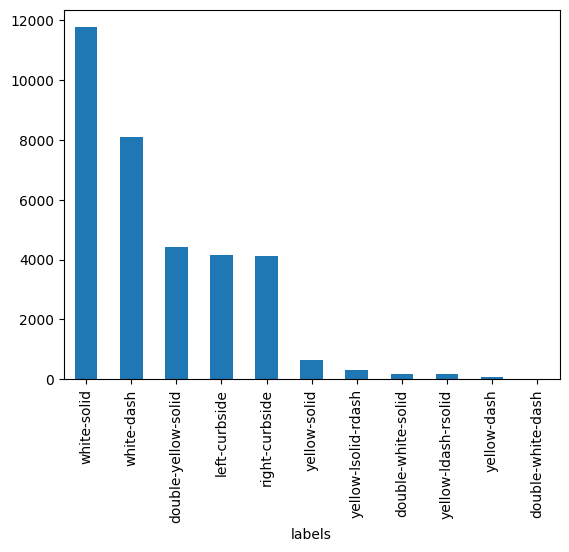

In [261]:
value_counts_df['abs'].plot(kind='bar')
plt.show()